In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('TelcomCustomer-Churn (1).csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

In [6]:
df = df[df['TotalCharges'].str.strip() != '']     #totalCharges is an object type, so we remove the '' and then change it to type float

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.shape                                         

(7032, 21)

In [9]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Bivarite and Multivariate Analysis


<Axes: >

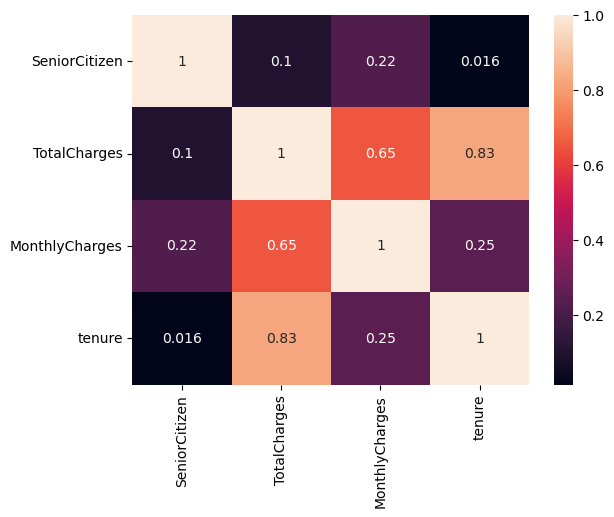

In [11]:
sns.heatmap(df[['SeniorCitizen', 'TotalCharges', 'MonthlyCharges',  'tenure']].corr(), annot=True)

In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Analysing Average Total Charges for people with partner and without

In [13]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

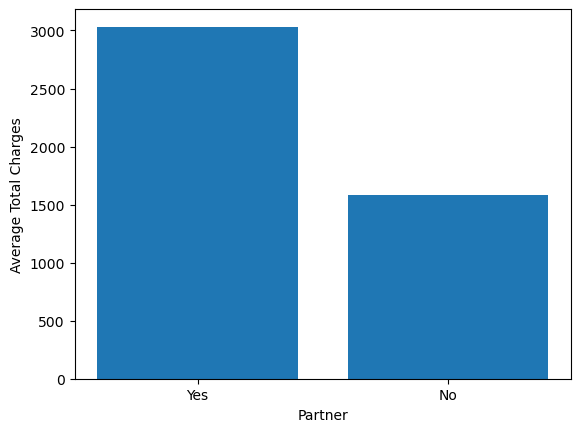

In [14]:
df1=df[df['Partner']=='Yes']
df2=df[df['Partner']=='No']

total_charges_1= df1['TotalCharges'].mean()
total_charges_2= df2['TotalCharges'].mean()

partner=['Yes','No']
charges=[total_charges_1, total_charges_2]
plt.bar(partner, charges)
plt.xlabel('Partner')
plt.ylabel('Average Total Charges')
plt.show()

## Analysing TotalCharges for Various Internet Services

In [15]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

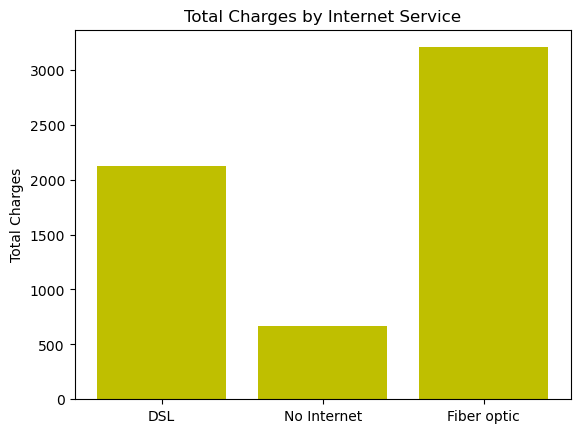

In [16]:
df1 = df[df['InternetService'] == 'DSL']
df2 = df[df['InternetService'] == 'No']
df3 = df[df['InternetService'] == 'Fiber optic']

total_charges_1 = df1['TotalCharges'].mean()
total_charges_2 = df2['TotalCharges'].mean()
total_charges_3 = df3['TotalCharges'].mean()
services = ['DSL', 'No Internet', 'Fiber optic']
total_charges = [total_charges_1, total_charges_2, total_charges_3]

plt.bar(services, total_charges, color='y')
plt.ylabel('Total Charges')
plt.title('Total Charges by Internet Service')
plt.show()

## Analysing Charges for Senior Citizens with Gender

In [17]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

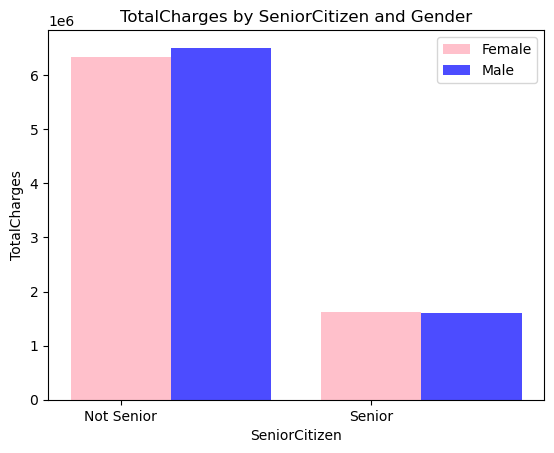

In [18]:
df1 = df[df['gender'] == 'Female']
df2 = df[df['gender'] == 'Male']

k = [0, 1]  
width = 0.4

total_charges_female = [df1[df1['SeniorCitizen'] == 0]['TotalCharges'].sum(),
                        df1[df1['SeniorCitizen'] == 1]['TotalCharges'].sum()]

total_charges_male = [df2[df2['SeniorCitizen'] == 0]['TotalCharges'].sum(),
                      df2[df2['SeniorCitizen'] == 1]['TotalCharges'].sum()]


plt.bar(k, total_charges_female, width=width, color='pink', label='Female')

plt.bar([p + width for p in k], total_charges_male, width=width, color='blue', alpha=0.7, label='Male')

plt.xticks(k, ['Not Senior', 'Senior'])

plt.xlabel('SeniorCitizen')
plt.ylabel('TotalCharges')
plt.title('TotalCharges by SeniorCitizen and Gender')

plt.legend()
plt.show()

In [19]:
x=df.iloc[:,1:20]   #splitting the dependent and independent variables
y=df.iloc[:,20]

## Encoding Categorical Columns

In [20]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [21]:
encoder=LabelEncoder()
encoders = {}

# Get list of non-numeric columns
columns = x.select_dtypes(exclude=[np.number]).columns.tolist()

# Encode non-numeric columns
for column in columns:
    encoder = LabelEncoder()
    x[column] = encoder.fit_transform(x[column])
    encoders[column] = encoder


# Save the encoders
for column, encoder in encoders.items():
    joblib.dump(encoder, f'{column}_encoder.pkl')

print("Encoders saved successfully!")

Encoders saved successfully!


In [22]:
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

In [23]:
#encoded x
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


## Performing train test split and scaling

In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)

x_test_scaled= scaler.transform(x_test)

In [26]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## Importing ensemble classifiers 

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [28]:
model_params=[
    {
    'model':RandomForestClassifier(),
    'params':{
        'n_estimators':[64,100,128],
        'max_features':['sqrt', 'log2']
    }
    },
    {
     'model':AdaBoostClassifier(),
        'params':{
            'n_estimators':[64,100,128]
        }
    },
    {
        'model':GradientBoostingClassifier(),
        'params':{
            'n_estimators':[100,128],
            'learning_rate':[0.1,0.2,0.3]
        }
    },
    {
        'model':XGBClassifier(),
        'params':{
            'min_child_weight':[0,1],
            'lambda':[0,1],
            'eta':[0.1,0.2,0.5]
        }
    }
    
]

## HyperParameter tuning using GridSearchCV

In [29]:
best_models=[]
for i in range(len(model_params)):
    model=model_params[i]['model']
    param= model_params[i]['params']
    
    grid= GridSearchCV(model, param, cv=5)
    grid.fit(x_train_scaled, y_train)
    
    best_models.append({
        'model': grid.best_estimator_,
        'params': grid.best_params_,
        'score': grid.best_score_
    })
    

/Users/harleen/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/harleen/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/harleen/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/harleen/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

In [30]:
for best_model in best_models:
    print(f"Best model: {best_model['model']}")
    print(f"Best parameters: {best_model['params']}")
    print(f"Best score: {best_model['score']}\n")

Best model: RandomForestClassifier(max_features='log2', n_estimators=64)
Best parameters: {'max_features': 'log2', 'n_estimators': 64}
Best score: 0.7962666666666667

Best model: AdaBoostClassifier(n_estimators=128)
Best parameters: {'n_estimators': 128}
Best score: 0.8039111111111111

Best model: GradientBoostingClassifier()
Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best score: 0.8040888888888889

Best model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None, lambda=1,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             

## Choosing and Saving the best model

In [31]:
model= GradientBoostingClassifier(learning_rate=0.1, n_estimators=100)

In [32]:
model.fit(x_train_scaled, y_train)

GradientBoostingClassifier()

In [33]:
joblib.dump(model, 'model.pkl')

['model.pkl']